## 投资组合的可行集
投资组合中的权重变量可以实现投资组合的预期收益率与收益波动率之间的映射关系。在投资组合的理论中，所有可能的投资组合被称为可行集，有效前沿就是可行集的一条包络线，它表示在不同的风险条件下能够给投资者带来的最高预期收益率，或者在不同预期收益率条件下能够给投资者带来的最低波动率。

下面以5只股票构成的投资组合为例绘制投资组合的可行集，其Python程序如下：

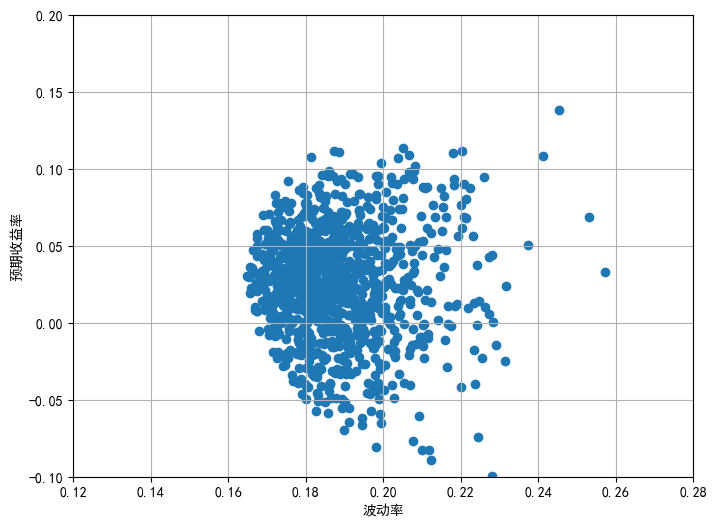

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif'] = ['SimHei'] #中文显示问题
plt.rcParams['axes.unicode_minus'] = False #负数显示问题


# 投资组合的有效前沿
Rp_list = []
Vp_list = []
#设定投资组合各产品的均值
R_mean = np.array([0.20,0.08,-0.17,0.06,-0.04])
#设定投资组合的协方差
R_cov = pd.DataFrame({'A':[0.09,0.02,0.02,0.01,0.02],\
              'B':[0.02,0.12,0.04,0.02,0.03],\
              'C':[0.02,0.04,0.07,0.02,0.03],\
              'D':[0.01,0.02,0.02,0.04,0.02],\
              'E':[0.02,0.03,0.03,0.02,0.04]})
        

for i in np.arange(1000):
    #随机生成1000次投资组合的权重
    x = np.random.random(5)
    weights = x/sum(x)
    Rp_list.append(np.sum(weights*R_mean))
    Vp_list.append(np.sqrt(np.dot(weights,np.dot(R_cov,weights.T))))
    
   
plt.figure(figsize=(8,6))
plt.scatter(Vp_list,Rp_list)
plt.xlim(0.12,0.28)
plt.ylim(-0.1,0.2)
plt.xlabel('波动率')
plt.ylabel('预期收益率')
plt.grid('True')


由可行集可知，在波动率一定的情况下，理性的投资者一定会选择可行集最上方的点进行投资，以实现收益率的最大化；在预期收益率一定的情况下，理性的投资者一定会选择可行集最左侧的点进行投资，以实现收益波动率的最小化（风险最小化）。

## 投资组合的有效前沿

In [2]:
'''
scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
fun:最优化的目标函数
x0：初始猜测值
method：优化方法，常用的方法有'BFGS','SLSQP'等
bounds：变量的边界值，元组形式
constraints：约束条件，字典形式({'type':'eq','fun':约束条件一},{'type':'ineq','fun':约束条件二})，'eq'表示等于0，'ineq'表示大于等于0
返回值
fun:目标函数值
sucess:布尔值，true成功
x:最优解
'''
# 求解最优权重
import scipy.optimize as sco

#定义一个最优化函数
def f(w):
    w = np.array(w) #设置投资组合每只股票的权重
    Rp_opt = np.sum(w*R_mean) #计算最优投资组合的预期收益率
    Vp_opt = np.sqrt(np.dot(w,np.dot(R_cov,w.T))) #计算最优投资组合的收益波动率
    return np.array([Rp_opt,Vp_opt])

def Vmin_f(w): 
    return f(w)[1]  #返回f(w)函数结果的波动率

#输入最优解条件，预期收益设定10%
cons = ({'type':'eq','fun':lambda x:np.sum(x)-1},{'type':'eq','fun':lambda x:f(x)[0]-0.1})
#输入边界条件
bnds = tuple((0,1) for x in range(len(R_mean)))
#生成初始权重（平均分配）
frist_weight = len(R_mean)*[1/len(R_mean)]

#求最值
result = sco.minimize(Vmin_f,frist_weight,method='SLSQP',bounds=bnds,constraints=cons)
# 获取最优化结果的权重
result['x'].round(4)
for i in np.arange(len(R_cov)):
    print('投资组合预期收益率10%时' + R_cov.columns[i] +'的权重：',result['x'][i].round(4))

#投资组合预期收益率10%时A的权重： 0.3109
#投资组合预期收益率10%时B的权重： 0.0859
#投资组合预期收益率10%时C的权重： 0.0
#投资组合预期收益率10%时D的权重： 0.5507
#投资组合预期收益率10%时E的权重： 0.0525


投资组合预期收益率10%时A的权重： 0.3109
投资组合预期收益率10%时B的权重： 0.0859
投资组合预期收益率10%时C的权重： 0.0
投资组合预期收益率10%时D的权重： 0.5507
投资组合预期收益率10%时E的权重： 0.0525


接下来求解投资组合的全局最小波动率及与之对应的预期收益率，其Python程序如下：

投资组合可行集最左侧点的收益率： 0.0371
投资组合可行集最左侧点的波动率： 0.1645


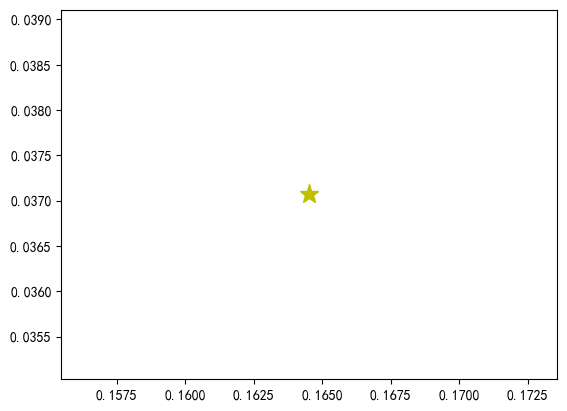

In [3]:
#求解有效前沿最左侧的点
#约束条件仅设置权重之和为1
cons_vmin = ({'type':'eq','fun':lambda x:np.sum(x)-1})
#求解全局最优解的权重
result_vmin = sco.minimize(Vmin_f,frist_weight,method='SLSQP',bounds=bnds,constraints=cons_vmin)
#求解投资组合的最左侧点的收益率
Rp_vmin = np.sum(R_mean*result_vmin['x'])
#求解投资组合的最左侧点的波动率
Vp_vmin = result_vmin['fun']

print('投资组合可行集最左侧点的收益率：',round(Rp_vmin,4))
print('投资组合可行集最左侧点的波动率：',round(Vp_vmin,4))

#投资组合可行集最左侧点的收益率： 0.0371
#投资组合可行集最左侧点的波动率： 0.1645

plt.plot(Vp_vmin,Rp_vmin,'y*',markersize=14)


在给定一组投资组合的预期收益率后，利用上述函数可以求解对应的最小波动率，即预期收益率对应的最小波动率，这些预期收益率及其对应的最小波动率就构成了有效前沿，其Python程序如下：

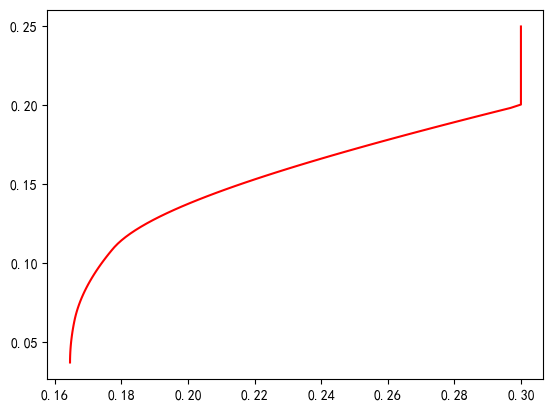

In [4]:
#求解有效前沿构成的曲线
#设定投资组合的预期收益率
Rp_target = np.linspace(Rp_vmin,0.25,100)
#设定波动率列表
Vp_target = []
for r in Rp_target:
    cons_new = ({'type':'eq','fun':lambda x:np.sum(x)-1},{'type':'eq','fun':lambda x:f(x)[0]-r})
    result_new = sco.minimize(Vmin_f,frist_weight,method='SLSQP',bounds=bnds,constraints=cons_new)
    Vp_target.append(result_new['fun'])
    
plt.plot(Vp_target,Rp_target,'r-')



## 资本市场线

假定无风险收益率为2%，其Python程序如下：

市场组合的收益率： 0.1688
市场组合的波动率： 0.2442


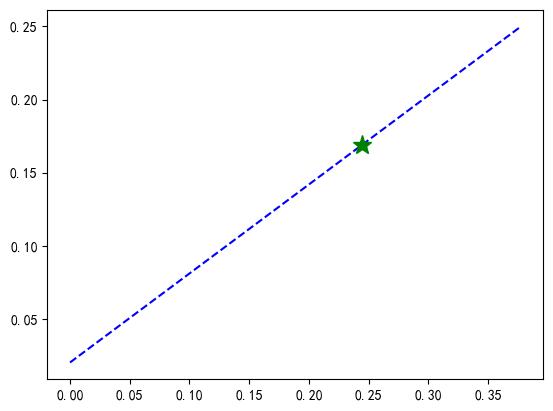

In [5]:
#CML（资本市场线）：考虑无风险资产的影响
def F(w):
    Rf = 0.02
    w = np.array(w)
    Rp_opt = np.sum(w*R_mean)
    Vp_opt = np.sqrt(np.dot(w,np.dot(R_cov,w.T)))
    SR = (Rp_opt-Rf)/Vp_opt #定义投资组合的夏普比率
    return np.array([Rp_opt,Vp_opt,SR])

def SRmin_F(w):
    return -F(w)[2] #求解最大的夏普比率就是求解负的最小值

#仅设定权重之和为1的约束条件
cons_SR = ({'type':'eq','fun':lambda x:np.sum(x)-1})
#求解最优权重
result_SR = sco.minimize(SRmin_F,frist_weight,method='SLSQP',bounds=bnds,constraints=cons_SR)

Rf= 0.02 #无风险利率
#最大夏普比率，即资本市场线斜率
slope = -result_SR['fun']
#市场组合的预期收益率
Rm = np.sum(R_mean*result_SR['x'])
#市场组合的波动率
Vm = (Rm-Rf)/slope

print('市场组合的收益率：',round(Rm,4))
print('市场组合的波动率：',round(Vm,4))

#市场组合的收益率： 0.1688
#市场组合的波动率： 0.2442

#画出资本市场线
Rp_cml = np.linspace(0.02,0.25)
Vp_cml = (Rp_cml - Rf)/slope
plt.plot(Vp_cml,Rp_cml,'b--')
plt.plot(Vm,Rm,'g*',markersize=14)
